# 九章 KNN 教程 

https://www.kaggle.com/c/digit-recognizer

In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
import matplotlib.pyplot as plt # 画图常用库

从 `../train.csv` and `../test.csv` 文件里面读入 numpy arrays.

导入数据后打印shape查看是否数据是否完整

导入数据差不多10秒

In [3]:

data_dir = "../"

# load csv files to numpy arrays
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
#     print(train.head())
#     print(train.shape)
#     print(train.head())
#     print(train[0:])
    X_train = train.values[0:train_row,1:] # 取下标为1-784的列（pixel0 - pixel783）
    y_train = train.values[0:train_row,0] # 取下标为0的列 (label)
    
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values  # 解释 value
#     print(Pred_test.shape)
#     print(pd.read_csv(data_dir + "test.csv").head())
    return X_train, y_train, Pred_test

train_row = 5000 # 如果想取全部数据，设置为最大值 42000
Origin_X_train, Origin_y_train, Origin_y_test = load_data(data_dir, train_row)



(42000, 785)


In [4]:
print(Origin_X_train.shape, Origin_y_train.shape, Origin_y_test.shape)
print(Origin_X_train)

(5000, 784) (5000,) (28000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 用图像展示一下数据集

4


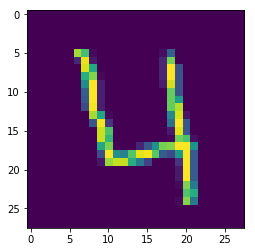

In [5]:
import matplotlib
import matplotlib.pyplot as plt
row = 3
# 展示第i个图
# print (X_train[row].reshape((28, 28)))

print (Origin_y_train[row])

plt.imshow(Origin_X_train[row].reshape((28, 28)))
plt.show()


展示部分数据看看图片是什么样子的。（有兴趣的同学可以自己看）

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


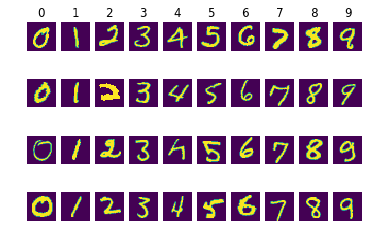

In [6]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in Origin_y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

把原本的训练数据拆分成为20%测试集（8400个），80%训练集（33600个）

怎么样2/8分

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(Origin_X_train,
                                                   Origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)
# 解释一下random 那个随机函数随机种子是什么。 随机种子一样，那么结果是一样的。

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 784) (1000, 784) (4000,) (1000,)



下面进行KNN模型训练
如果是大数据，需要1.5小时跑完

In [8]:
import time
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

ans_k = 0

k_range = range(1,8)
scores = []

# 这个地方通过枚举所有的k值来取找到最好的k值预测数据
for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_test, y_pred))  
    print(confusion_matrix(y_test, y_pred))  
    
    print("Complete time: " + str(end-start) + " Secs.")


k = 1 begin 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  

# 通过训练我们可以找到最好的测试数据集，打印出Accuracy的图

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915]


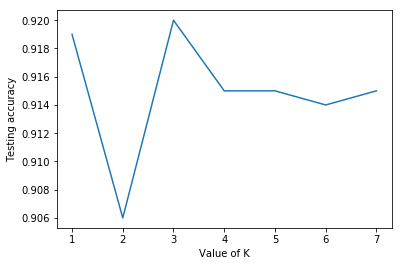

In [9]:

print (scores)
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

# 预测测试数据集的结果


In [11]:
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Origin_X_train,Origin_y_train)
y_pred = knn.predict(Origin_y_test)

# 验证一下结果

1


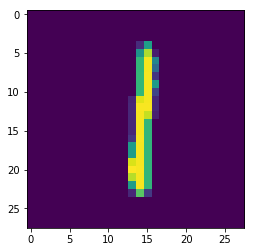

In [12]:
print (y_pred[200])
plt.imshow(Origin_y_test[200].reshape((28, 28)))
plt.show()

# 预测之后，我们把预测好的数据打印到文件Digit_Recogniser_Result.csv里面。
# 打印的格式是如下

* ImageId	Label
* 1	2
* 2	0
* 3	9
* 4	9

In [13]:
print(len(y_pred))

# save submission to csv
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)


28000
